# Array-Oriented Programming with Arrays


Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as vectorization. In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later, in Appendix A, I explain *broadcasting*, a powerful method for vectorizing computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The numpy.meshgrid function takes two onedimensional arrays and produces two two-dimensional matrices corresponding to all
pairs of (x, y) in the two arrays:


In [1]:
import numpy as np

points = np.arange(-5, 5, 0.01) # 100 equally spaed points

xs, ys = np.meshgrid(points, points)

In [2]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [3]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [4]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

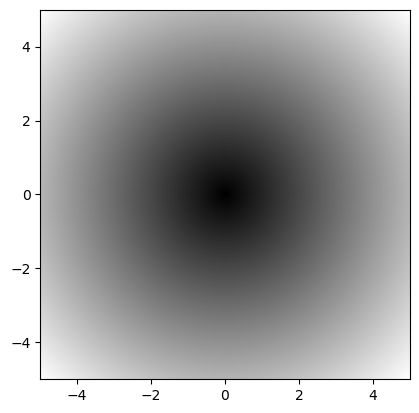

In [5]:
## Visualizing the 2d array

import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5 , 5, -5 , 5])

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rahim\AppData\Local\Temp\ipykernel_8724\3054260685.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


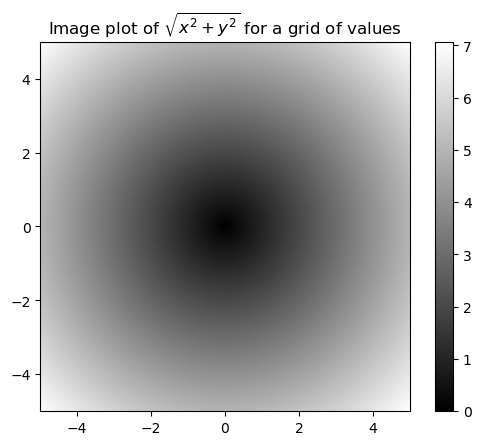

In [6]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray, extent=[-5 , 5, -5 , 5])
plt.colorbar()

## Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y. Suppose we had a Boolean array and two arrays of values:

In [7]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [8]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [9]:
result = [(x if c else y) 
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With numpy.where you can do this with a single function call:

In [10]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to numpy.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with numpy.where:


In [11]:
rng = np.random.default_rng(seed=12345)

arr = rng.standard_normal((4,4))
arr

array([[-1.42382504,  1.26372846, -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  0.6488928 ],
       [ 0.36105811, -1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317, -0.06068952]])

In [12]:
arr > 0

array([[False,  True, False, False],
       [False, False, False,  True],
       [ True, False,  True,  True],
       [False,  True, False, False]])

In [13]:
np.where(arr>0, 2, -2)

array([[-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2,  2, -2, -2]])

You can combine scalars and arrays when using numpy.where. For example, I can replace all positive values in arr with the constant 2, like so:


In [14]:
np.where(arr > 0, 2, arr) #set only positive values to 2

array([[-1.42382504,  2.        , -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  2.        ],
       [ 2.        , -1.95286306,  2.        ,  2.        ],
       [-0.75938718,  2.        , -0.46695317, -0.06068952]])

## Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like numpy.sum, you have to pass the array you want to aggregate as the first argument. 

Here I generate some normally distributed random data and compute some aggregatestatistics:

In [15]:
arr = rng.standard_normal((5, 4))

arr

array([[ 0.78884434, -1.25666813,  0.57585751,  1.39897899],
       [ 1.32229806, -0.29969852,  0.90291934, -1.62158273],
       [-0.15818926,  0.44948393, -1.34360107, -0.08168759],
       [ 1.72473993,  2.61815943,  0.77736134,  0.8286332 ],
       [-0.95898831, -1.20938829, -1.41229201,  0.54154683]])

In [16]:
arr.mean()

0.17933634979615845

In [17]:
np.mean(arr)

0.17933634979615845

In [18]:
arr.sum()

3.586726995923169

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one less dimension:

In [19]:
arr.mean(axis = 1)

array([ 0.37675318,  0.07598404, -0.2834985 ,  1.48722347, -0.75978045])

In [20]:
arr.sum(axis = 0)

array([ 2.71870476,  0.30188842, -0.49975489,  1.0658887 ])

> Here, arr.mean(axis=1) means “compute mean across the columns,” where arr.sum(axis=0) means “compute sum down the rows.”


Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:


In [21]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [22]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression arr.cumsum(axis=0) computes the cumulative sum along the rows, while arr.cumsum(axis=1) computes the sums along the columns:


In [23]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [24]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

| Method(s)                 | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `sum`                    | Sum of all elements in the array or along an axis; zero-length arrays have sum `0` |
| `mean`                   | Arithmetic mean; returns `NaN` for zero-length arrays                      |
| `std`, `var`             | Standard deviation and variance, respectively                              |
| `min`, `max`             | Minimum and maximum                                                         |
| `argmin`, `argmax`       | Indices of minimum and maximum elements, respectively                       |
| `cumsum`                 | Cumulative sum of elements starting from 0                                  |
| `cumprod`                | Cumulative product of elements starting from 1                              |

## Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a Boolean array:


In [26]:
arr = rng.standard_normal(100)

(arr>0).sum() #number of positive values

51

In [27]:
(arr <= 0).sum() #number of non-positive values

49

The parentheses here in the expression (arr > 0).sum() are necessary to be able to call sum() on the temporary result of arr > 0.

Two additional methods, any and all, are useful especially for Boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is
True:

In [29]:
bools = np.array([False, False, True, False])

bools.any()

True

In [30]:
bools.all()

False

These methods also work with non-Boolean arrays, where non zero elements aretreated as True.


## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in place with the sort method:

In [32]:
arr = rng.standard_normal(6)

In [33]:
arr

array([ 0.28208603, -0.62361213,  1.12182226,  0.84122103, -0.7758961 ,
        0.41071644])

In [34]:
arr.sort()

In [35]:
arr

array([-0.7758961 , -0.62361213,  0.28208603,  0.41071644,  0.84122103,
        1.12182226])

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to sort. In this example data:


In [36]:
arr = rng.standard_normal((5, 3))

arr

array([[-2.7224161 , -0.6733048 ,  1.24622153],
       [ 0.79020803,  0.17534089, -0.0292946 ],
       [-1.41951426, -1.35996632,  0.22341156],
       [ 1.76177943, -2.17088985,  0.62848817],
       [ 0.60119653,  0.95075786, -0.86924667]])

In [37]:
# arr.sort(axis=0) sorts the values within each column, while arr.sort(axis=1) sorts across each row:

arr.sort(axis = 0)

In [38]:
arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [ 0.60119653, -0.6733048 ,  0.22341156],
       [ 0.79020803,  0.17534089,  0.62848817],
       [ 1.76177943,  0.95075786,  1.24622153]])

In [39]:
 arr.sort(axis=1)

In [40]:
arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [-0.6733048 ,  0.22341156,  0.60119653],
       [ 0.17534089,  0.62848817,  0.79020803],
       [ 0.95075786,  1.24622153,  1.76177943]])

The top-level method numpy.sort returns a sorted copy of an array (like the Python built-in function sorted) instead of modifying the array in place. For example:


In [41]:
arr2 = np.array([5, -10, 1, 0, -3])

sorted_arr2 = np.sort(arr2)

sorted_arr2

array([-10,  -3,   0,   1,   5])

## Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is numpy.unique, which returns the sorted unique values in an array:

In [42]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [43]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

np.unique(ints)

array([1, 2, 3, 4])

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list

Another function, numpy.in1d, tests membership of the values in one array in another, returning a Boolean array:


In [45]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

### 🔧 NumPy Set Operations Methods

| Method            | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `unique(x)`       | Compute the sorted, unique elements in `x`                                  |
| `intersect1d(x, y)` | Compute the sorted, common elements in `x` and `y`                         |
| `union1d(x, y)`     | Compute the sorted union of elements in `x` and `y`                        |
| `in1d(x, y)`        | Compute a Boolean array indicating whether each element of `x` is in `y`   |
| `setdiff1d(x, y)`   | Set difference: elements in `x` that are not in `y`                        |
| `setxor1d(x, y)`    | Set symmetric differences: elements in either `x` or `y`, but not both     |
